## **Lab 2: Simple Linear Regression**

### **1. Manipulate the data $ \text{fd}_{(398x6)} $**

Tasks: 

*   Load the data with: `pdf.read_csv()`
*   Show the array, get array size and list x items and get: `.values`, `.shape` & `.head()`
*   Display data of the column of cylinders & mpg: `df['cylinders']` & `df[['cylinders','mpg']]`


In [28]:
import pandas as pd
import numpy as np
myhead = ['mpg','cylinder','displacement','horsepower','weight','acceleration','model year','origin','car name'];
fd = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None,delim_whitespace=True,names=myhead,na_values='?');
fd.head(5)

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [29]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

myhead = ['mpg','cylinder','displacement','horsepower','weight','acceleration','model year','origin','car name'];
fd = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None,delim_whitespace=True,names=myhead,na_values='?');

x = np.array(fd['displacement']);
y = np.array(fd['mpg']);


In [30]:
dfshow = fd[['displacement','horsepower']]
dfshow.head(4)

,displacement,horsepower
0,307.0,130.0
1,350.0,165.0
2,318.0,150.0
3,304.0,150.0


### **2. Compute the means ($\bar{x}, \bar{y}$), covariance ($S_{xy}, S_{xx}$) and $\beta$s as:**
$$
\begin{align}
\bar{x} &= \frac{1}{N}\sum_{i=1}^{N}{(x_i)} &
\bar{y} &= \frac{1}{N}\sum_{i=1}^{N}{(y_i)} \\
s_{xy} &= \frac{1}{N}\sum_{i=1}^{N}{(x_i-\bar{x})(y_i-\bar{y})} &
S^2_{x}  &= S_{xx}= \frac{1}{N}\sum_{i=1}^{N}{(x_i - \bar{x})^2} \\
\beta_1 &= \frac{S_{xy}}{S^2_{x}} = \frac{r_{xy}S_{y}}{S_{x}}&
\beta_0 &= \bar{y}-\beta_1\bar{x}\\
RSS_{(\beta_0,\beta_1)} &:=\sum^n_{i=1}{(y_i-\hat{y}_i)^2} &
\hat{y}_i &= \beta_1x_i + \beta_0
\end{align}
$$
Tasks:


*   Show values with decimals: `print({:.3f}.format(xm))` or `print('%.2f' %xm)`



xm: 193.43 and ym: 23.51
thi is xm: 193.426 thi is ym: 23.515
beta_1:  -0.06028240546881722
beta_0: 35.17475015429319


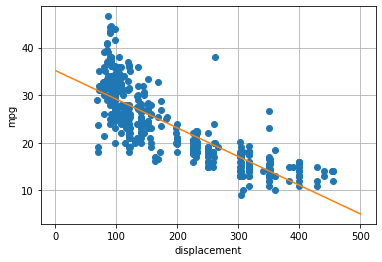

In [31]:
xm = np.mean(x);
ym = np.mean(y);

print("xm: %.2f" %xm,"and ym: %.2f" %ym)
print('thi is xm: {:.3f}'.format(xm),'thi is ym: {:.3f}'.format(ym))

syx = np.mean((y-ym)*(x-xm))
sxx = np.mean((x-xm)**2);
syy = np.mean((y-ym)**2);
beta1 = syx/sxx;
beta0 = ym - beta1*xm;
print("beta_1: ",beta1);
print("beta_0:",beta0);

#fig, ax = plt.subplots()
plt.plot(x,y,'o');
plt.xlabel('displacement');
plt.ylabel('mpg');
plt.grid(True)

#print(len(x))
xlines=np.linspace(1,500,600)      # from 1 to 10, by 50
plt.plot(xlines, beta0 +beta1*xlines )        # abline
plt.show()

### **3. Pick interval with condition and drop NA values**
Tasks:

  **3.1**   Pick values of y (mpg) so that its acceleration `acc>25`<br>
  **3.2**  List items and drop the ones who don't have a value or are empty

Example: Pick all $a_n | b_n>2$
$$
a_n\,\,\,b_n\\
\begin{bmatrix}
6 & 2\\
8 & 4\\
4 & 8
\end{bmatrix}
$$
Then $a_n=\{8,4\}$, in programming to calculate the mean of such $a_n$ with that condition, it'll be `print(np.mean(an[bn>2]))` 



In [32]:
val = np.array([[6,2],[8,4],[4,8]])
xn = val[:,0]
print(xn)
yn = val[:,1]
I = (yn>2)
print(I)
print(np.mean(xn*I)/np.mean(I))
print(np.mean(xn*I))
print(np.mean(xn[yn>2]))

[6 8 4]
[False  True  True]
6.0
4.0
6.0


Mean of mpg | acc>25: 25.85


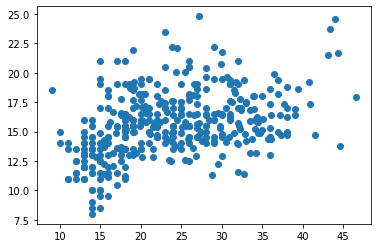

In [33]:
#3.1 Pick values of y (mpg) so that its acceleration acc>25
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
acc = np.array(fd['acceleration'])
plt.plot(y,acc,'o')
print('Mean of mpg | acc>25: %.2f' %np.mean(y[acc>15]))

In [36]:
!jupyter nbconvert --execute --to markdown Lec02.ipynb

[NbConvertApp] Converting notebook Lec02.ipynb to markdown
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] ERROR | Error while converting 'Lec02.ipynb'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/nbconvert/nbconvertapp.py", line 410, in export_single_notebook
    output, resources = self.exporter.from_filename(notebook_filename, resources=resources)
  File "/usr/local/lib/python3.7/dist-packages/nbconvert/exporters/exporter.py", line 179, in from_filename
    return self.from_file(f, resources=resources, **kw)
  File "/usr/local/lib/python3.7/dist-packages/nbconvert/exporters/exporter.py", line 197, in from_file
    return self.from_notebook_node(nbformat.read(file_stream, as_version=4), resources=resources, **kw)
  File "/usr/local/lib/python3.7/dist-packages/nbconvert/exporters/templateexporter.py", line 307, in from_notebook_node
    nb_copy, resources = super(TemplateExporter, self).from_notebook_node(nb, resources, **kw)
